<a href="https://www.kaggle.com/code/alaaelnakeeb/employee-attrition-eda?scriptVersionId=156329584" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# # Problem:
we need to define the reasons for employees satisfaction and attrition(employees leave the company for whatever reason, either they've found a new job or retired, and haven't been replaced immediately) from the company.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler

# * Data Understanding*

In [2]:
#loading data
df=pd.read_csv("/kaggle/input/employee-attrition/WA_Fn-UseC_-HR-Employee-Attrition.csv",sep=",",encoding="utf-8")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Calculate the percentage of missing values for each column
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display missing percentages
missing_data = pd.DataFrame({'Column': missing_percentages.index, 'MissingPercentage': missing_percentages.values})

# Sort the DataFrame by missing percentage in descending order
missing_data.sort_values(by='MissingPercentage', ascending=False)

,Column,MissingPercentage
0,Age,0.0
26,StandardHours,0.0
20,NumCompaniesWorked,0.0
21,Over18,0.0
22,OverTime,0.0
23,PercentSalaryHike,0.0
24,PerformanceRating,0.0
25,RelationshipSatisfaction,0.0
27,StockOptionLevel,0.0
18,MonthlyIncome,0.0


-  we are having  no any missing values in our dataset.

In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

**Exclude features with only one value for EmployeeCount, Over18, and StandardHours.**

In [8]:
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)
df.shape

(1470, 32)

In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
df.describe(include="object")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


# Count values for object

In [11]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [12]:
df['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [13]:
df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [14]:
df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [15]:
df['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [16]:
df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [17]:
df['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

# Correlation Matrix

<Axes: >

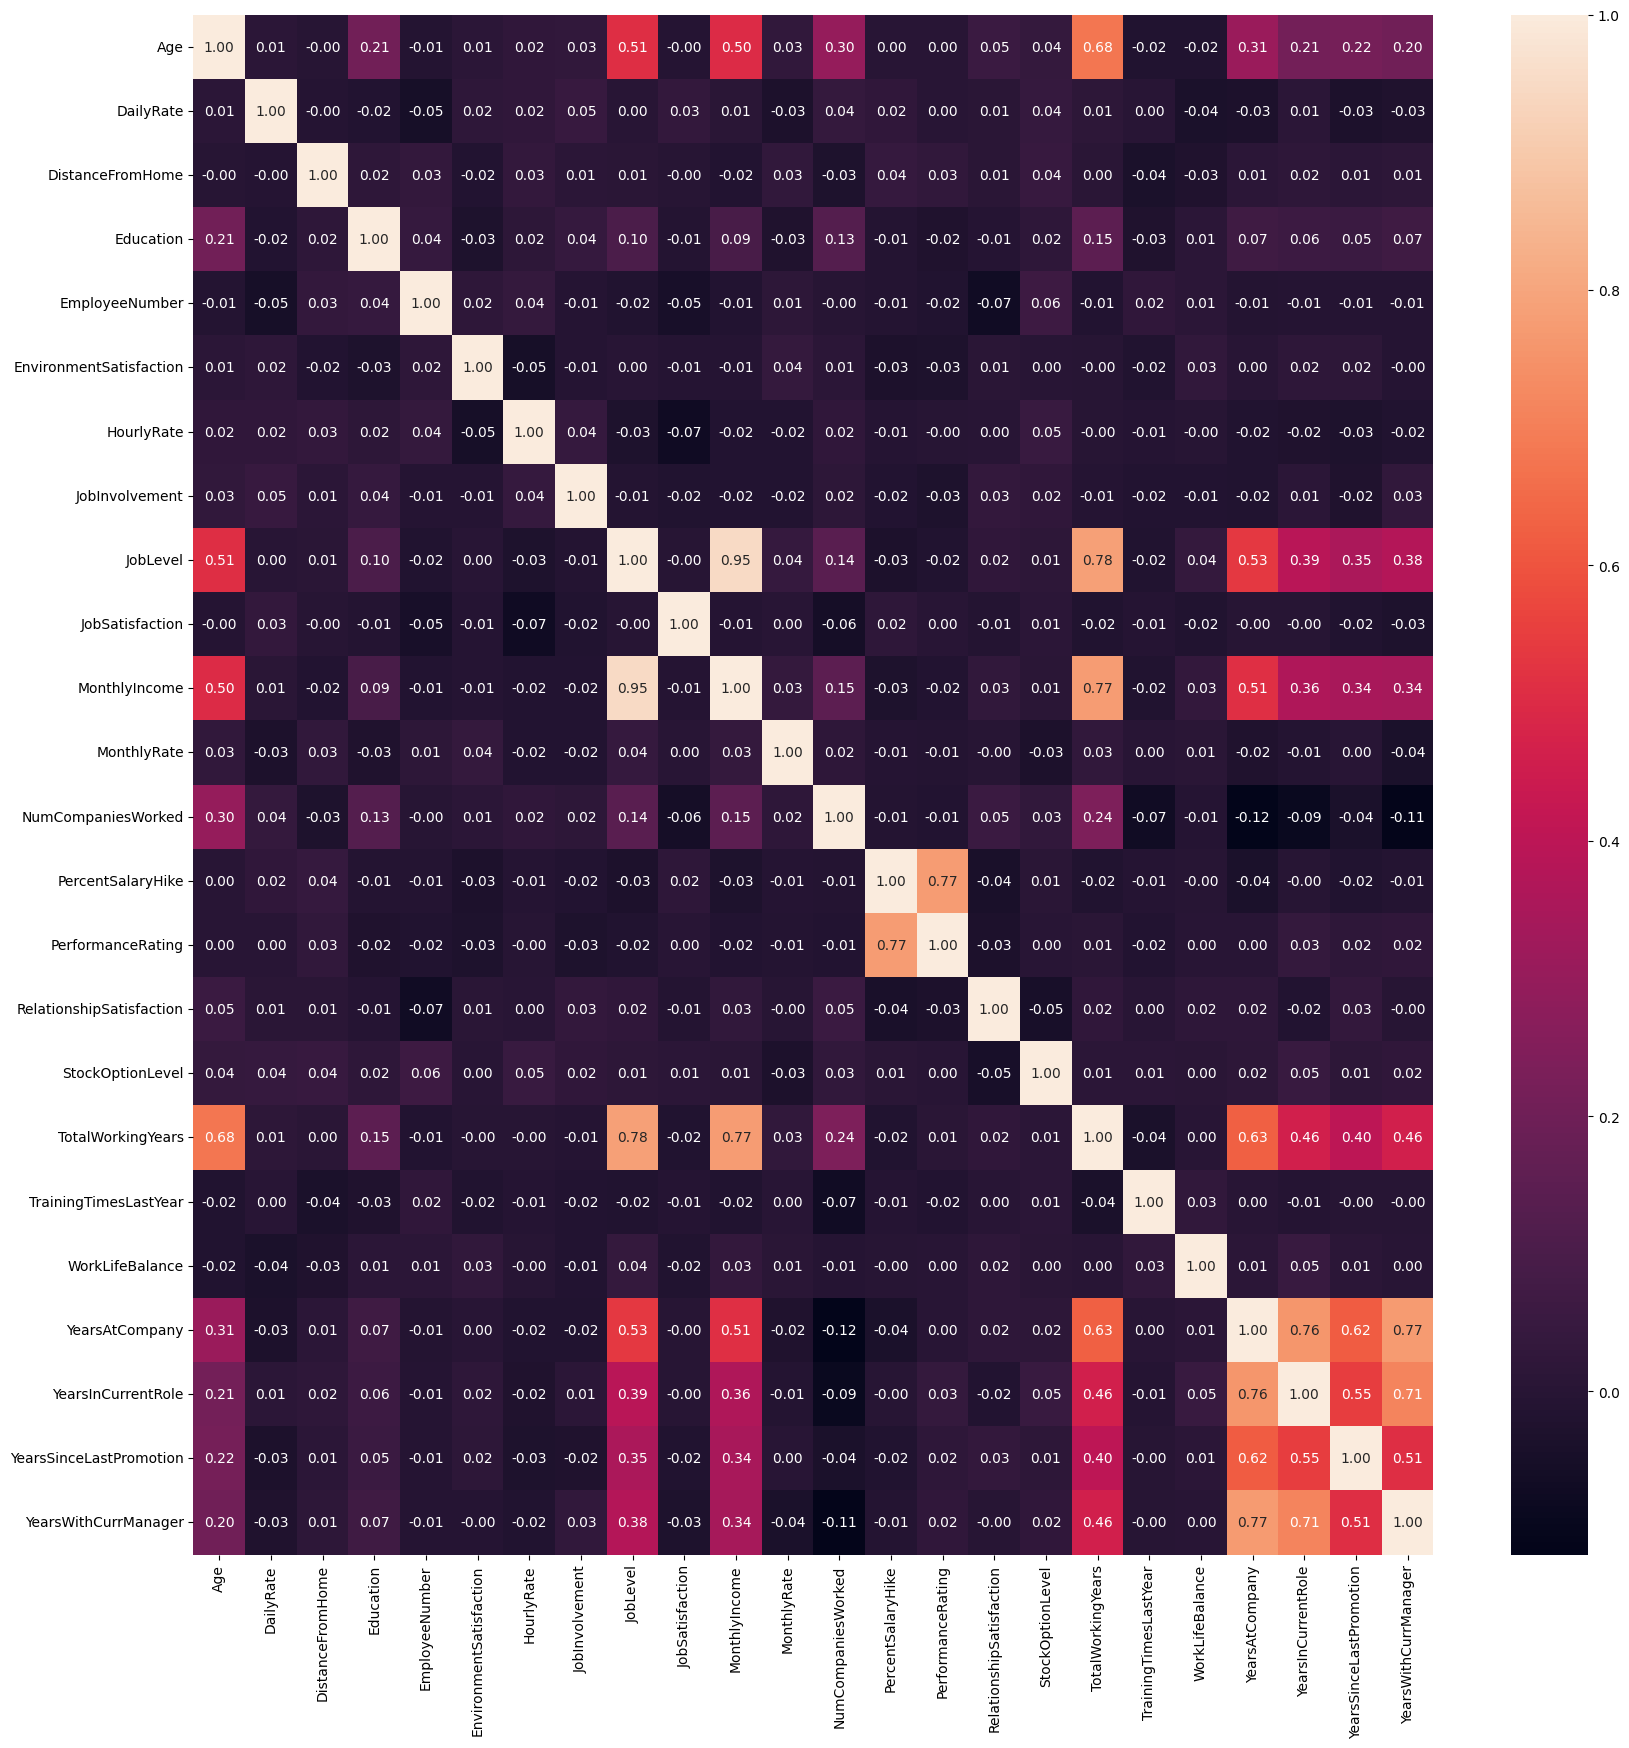

In [18]:
numeric_columns = df.select_dtypes(include=[np.number])
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_columns.corr(), annot=True, fmt='.2f')


1. percentsalaryhike has heigher corrleation with performancerating
2. job level with monthly income and totalworkingyears
3. monthlyincome with totalworkingyears

# Answer Business Questions :

# 1. How Is Attrition Affected by Gender?

In [19]:
G_A=df.groupby(['Gender'])[['Attrition']].value_counts().reset_index()
G_A

,Gender,Attrition,count
0,Female,No,501
1,Female,Yes,87
2,Male,No,732
3,Male,Yes,150


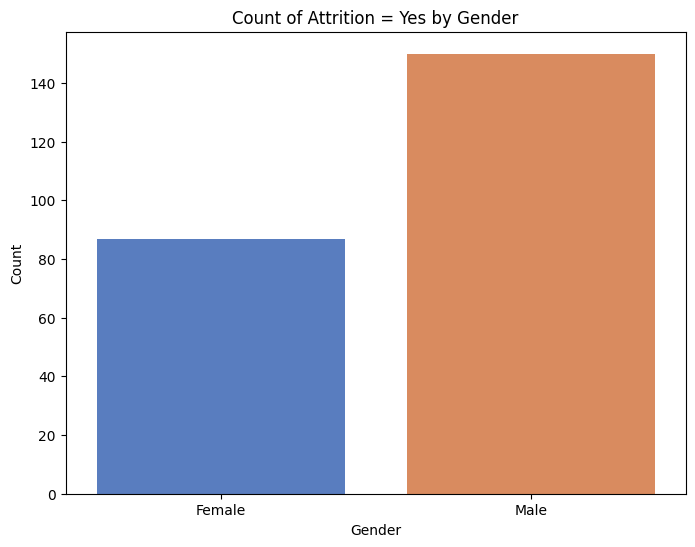

In [20]:
yes_attrition = G_A[G_A['Attrition'] == 'Yes']

plt.figure(figsize=(8, 6))
sns.barplot(data=yes_attrition, x='Gender', y='count', palette='muted')
plt.title('Count of Attrition = Yes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

num of male still greater than num of female in both (yes or no attrition)

# 2. How Is Attrition Affected by business travels?

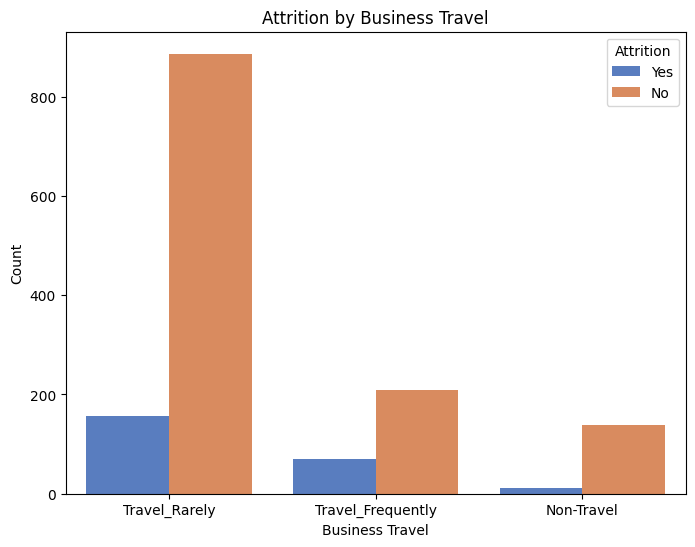

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='BusinessTravel', hue='Attrition', palette='muted')
plt.title('Attrition by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

# 3. what is effect of the distance from home on attrition ?

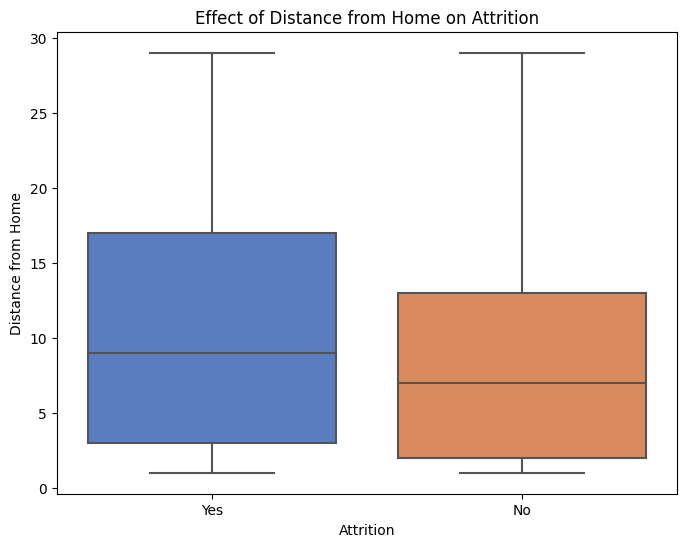

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Attrition', y='DistanceFromHome', palette='muted')
plt.title('Effect of Distance from Home on Attrition')
plt.xlabel('Attrition')
plt.ylabel('Distance from Home')
plt.show()

<Axes: xlabel='DistanceFromHome', ylabel='Density'>

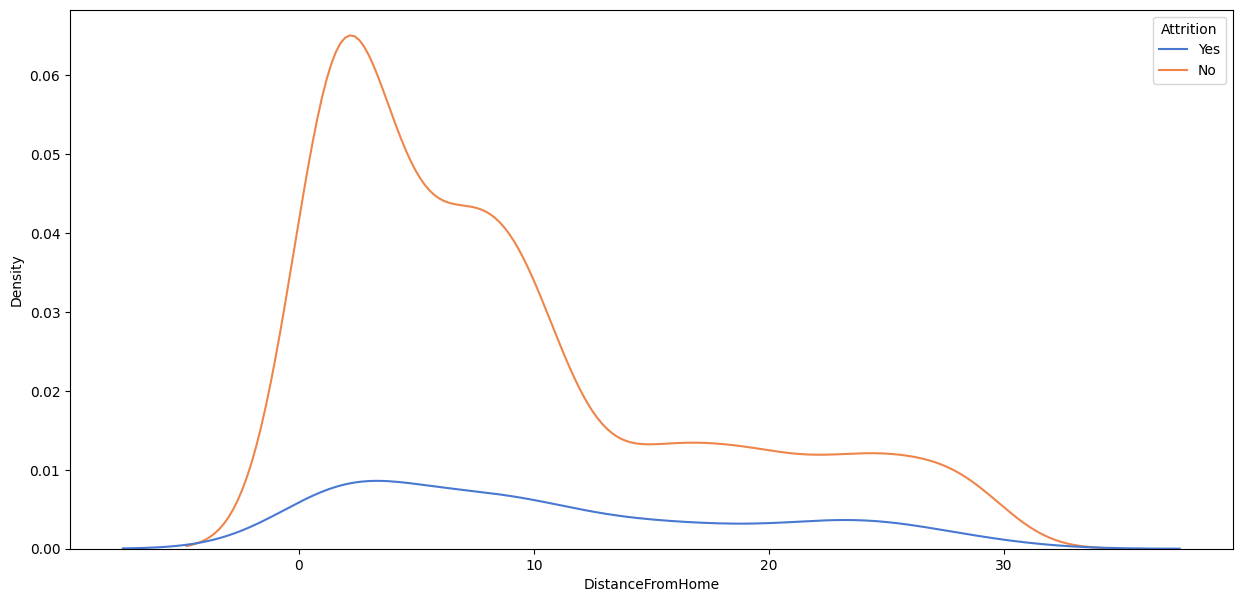

In [23]:
plt.figure(figsize=(15,7))
sns.kdeplot(data=df, x = "DistanceFromHome", hue="Attrition", palette='muted')

# 4. What is the most Department of attritions ?

# &&5. Does the Department of work impact attrition?

In [24]:
# Filter the DataFrame for employees with attrition
attrition_data = df[df['Attrition'] == 'Yes']

# Calculate the count of attritions per department
attrition_by_department = attrition_data['Department'].value_counts()

# Display the department with the most attritions
most_attritions_department = attrition_by_department.idxmax()
attritions_count = attrition_by_department.max()

print(f"The department with the most attritions is '{most_attritions_department}' with {attritions_count} attritions.")


The department with the most attritions is 'Research & Development' with 133 attritions.


In [25]:
fig = px.histogram(attrition_data, x = attrition_data['Department'])
fig.show()

# 6. What is the most job role of attritions ?

In [26]:
# Calculate the count of attritions per job role
attrition_by_job_role = attrition_data['JobRole'].value_counts()

# Display the job role with the most attritions
most_attritions_job_role = attrition_by_job_role.idxmax()
attritions_count = attrition_by_job_role.max()

print(f"The job role with the most attritions is '{most_attritions_job_role}' with {attritions_count} attritions.")


The job role with the most attritions is 'Laboratory Technician' with 62 attritions.


In [27]:
fig = px.histogram(attrition_data, x = attrition_data['JobRole'])
fig.show()

# 7-what is effect of age on attrition ?

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

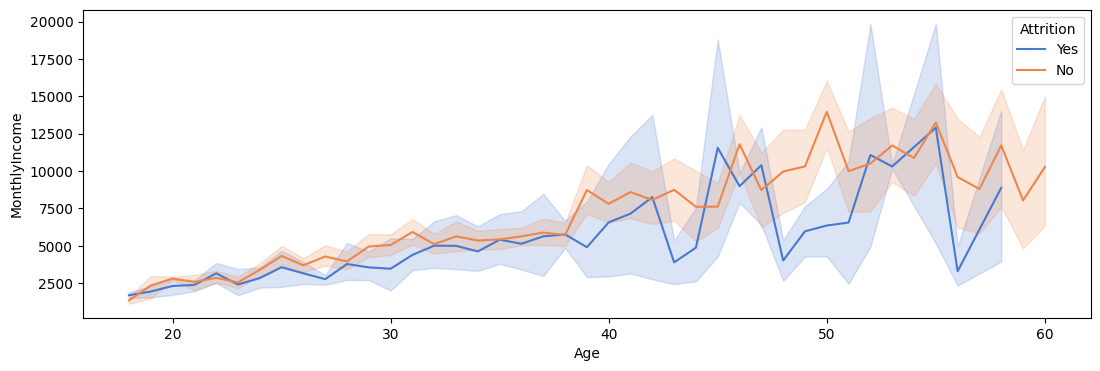

In [28]:
plt.figure(figsize=(13,4))
sns.lineplot(data=df,x='Age',y='MonthlyIncome',hue="Attrition", palette='muted')

In [29]:
maxx=df['Age'].max()
minn=df['Age'].min()
print(maxx)
print(minn)

60
18


In [30]:
interval = pd.interval_range(start= 18 , freq = 10 , end = 68)
df['Age_Interval'] = pd.cut(df['Age'] , bins = interval , labels= [])
da=df.groupby(['Attrition'])[['Age_Interval']].value_counts().reset_index()
da.set_axis(['Attrition','Age_interval','Count'],axis='columns')
da

,Attrition,Age_Interval,count
0,No,"(28, 38]",547
1,No,"(38, 48]",329
2,No,"(18, 28]",181
3,No,"(48, 58]",157
4,No,"(58, 68]",15
5,Yes,"(28, 38]",101
6,Yes,"(18, 28]",69
7,Yes,"(38, 48]",38
8,Yes,"(48, 58]",25
9,Yes,"(58, 68]",0


Text(0.5, 1.0, 'Ratio of Age and Attrition')

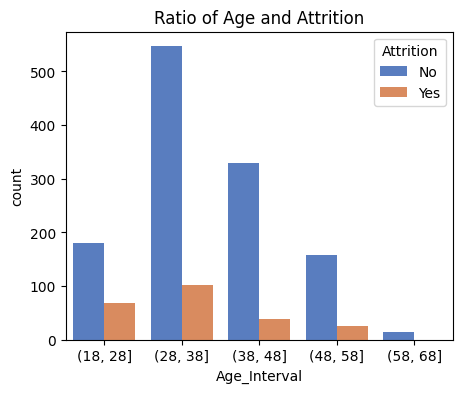

In [31]:
plt.figure(figsize=(5,4))
sns.barplot(data=da,x='Age_Interval',y='count',hue="Attrition", palette='muted')
plt.title("Ratio of Age and Attrition")

# 8- Is salary is one of the main reasons?

/tmp/ipykernel_19/2259529143.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='MonthlyIncome', ylabel='Density'>

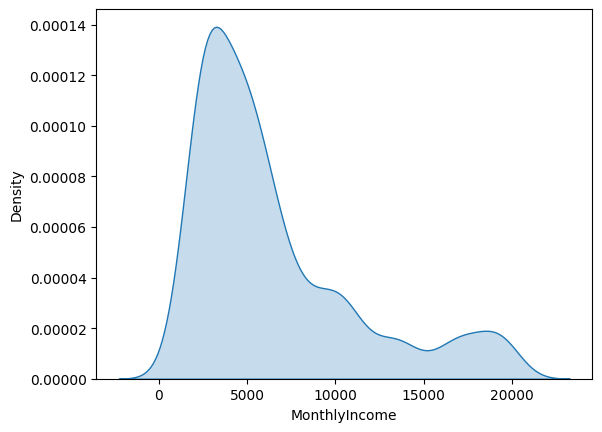

In [32]:
sns.kdeplot(data=df,x="MonthlyIncome",shade=True)

# 9.How much does income matter?

Text(0.5, 1.0, 'Ratio between Income and HourlyRate')

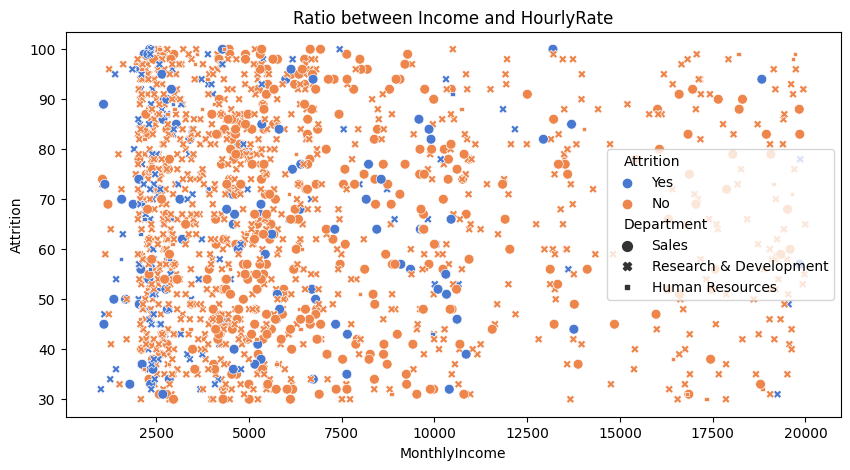

In [33]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=df,x='MonthlyIncome',y='HourlyRate',hue="Attrition",style="Department",size="Department",sizes=(20,50), palette='muted')
plt.ylabel('Attrition')
plt.xlabel('MonthlyIncome')
plt.title("Ratio between Income and HourlyRate")

 most employees have Monthly rate 1000 to 7500 left jobs anf alot of them at sales and research & devlopment department so may be income effect on attrition.

# 10-Which Education Field is more likely to leave?

In [34]:
df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

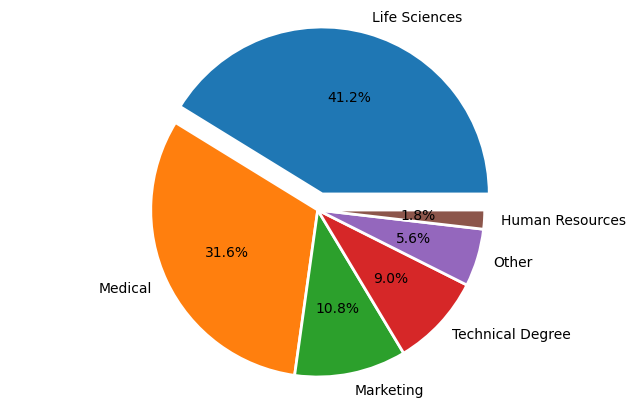

In [35]:
plt.figure(figsize = (8,5))
explode = (0.1,0,0,0,0,0)
label=['Life Sciences',"Medical","Marketing","Technical Degree","Other","Human Resources"]
plt.pie(df['EducationField'].value_counts(), explode = explode, labels = label,autopct = '%1.1f%%',wedgeprops = {"edgecolor" : "w",'linewidth' : 2})
plt.axis('equal') 
plt.show()

In [36]:
da4=df.groupby(['EducationField'])[['Attrition']].value_counts().reset_index()
da4.set_axis(['EducationField','Attrition','Count'],axis='columns')
da4

,EducationField,Attrition,count
0,Human Resources,No,20
1,Human Resources,Yes,7
2,Life Sciences,No,517
3,Life Sciences,Yes,89
4,Marketing,No,124
5,Marketing,Yes,35
6,Medical,No,401
7,Medical,Yes,63
8,Other,No,71
9,Other,Yes,11


<Axes: xlabel='count', ylabel='EducationField'>

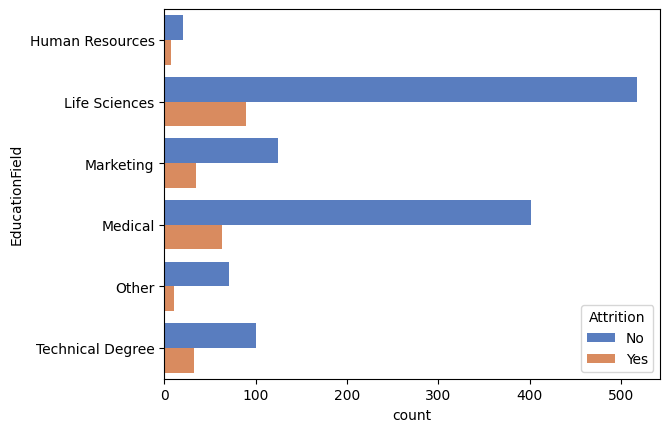

In [37]:
sns.barplot(data=da4,x="count",y="EducationField",hue="Attrition", palette='muted')

Field of Life Science is bigest field ,where employees work in it and has heigher number from left employees.

# 11.Do Education Field play a role?

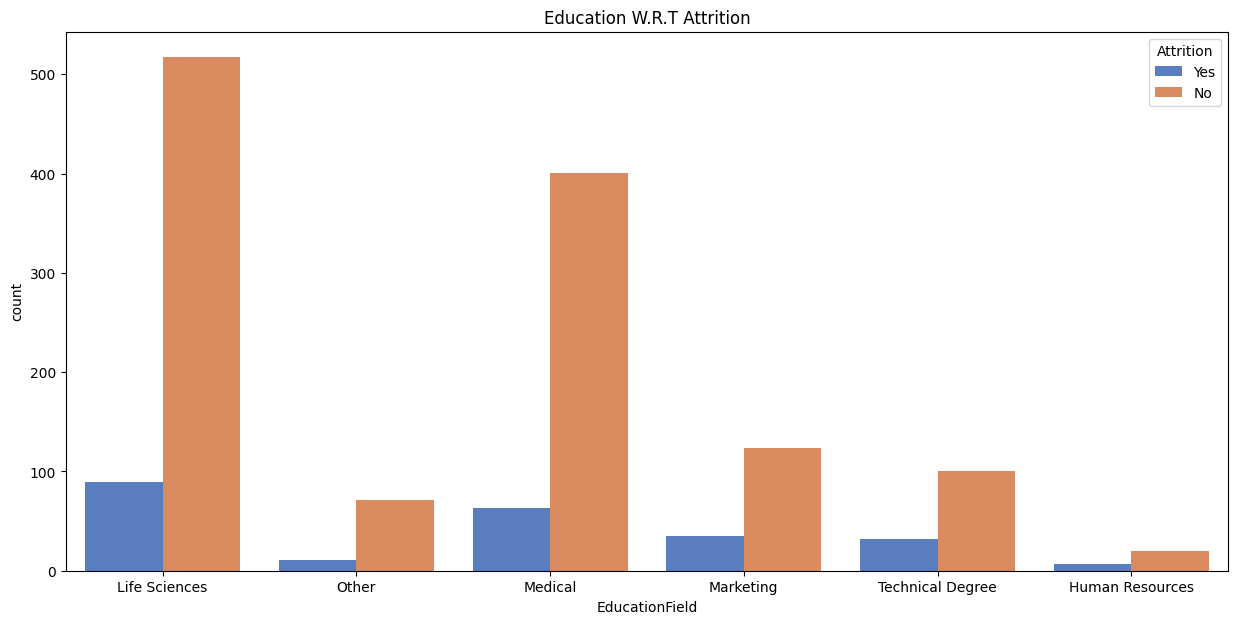

In [38]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['EducationField'], hue='Attrition', data=df, palette='muted')
plt.title("Education W.R.T Attrition")
plt.show()

# 12.Do overtime stresses employees and makes them have to leave?

In [39]:
overtime_counts = df.groupby('OverTime')['Attrition'].value_counts().to_frame()
sizes = overtime_counts.values
labels = overtime_counts.index
labels = [labels[2][1], labels[3][1]]
overtime_counts

count
OverTime Attrition       
No       No           944
         Yes          110
Yes      No           289
         Yes          127

In [40]:
import plotly.graph_objects as go
labels = ['Overtime', 'No Overtime']
values = [289, 127]

fig = go.Figure()
fig.add_trace(go.Pie(labels=labels, values=values, hole=0.5))
fig.update_layout(title='Overtime X Attrition', autosize=False, width=500, height=450)
fig.show()


# 13.How does Work Life Balance impact the overall attrition rates?

In [41]:
df.groupby('WorkLifeBalance')['Attrition'].value_counts().to_frame()


count
WorkLifeBalance Attrition       
1               No            55
                Yes           25
2               No           286
                Yes           58
3               No           766
                Yes          127
4               No           126
                Yes           27

This implies that a better work-life balance might contribute to employee retention.

# 14. what is effect of YearsWithCurrManager on attrition ?

<Axes: xlabel='YearsWithCurrManager', ylabel='Density'>

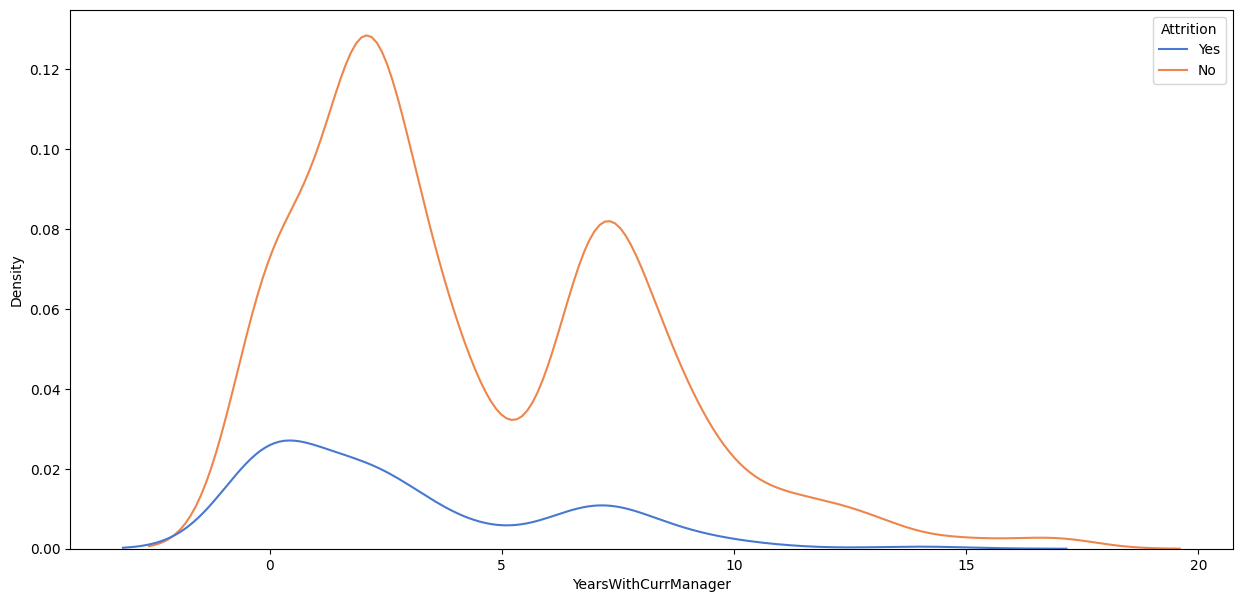

In [42]:
plt.figure(figsize=(15,7))
sns.kdeplot(data=df, x = "YearsWithCurrManager", hue="Attrition", palette='muted')

# 15. Do overtime stresses employees and makes them have to leave?


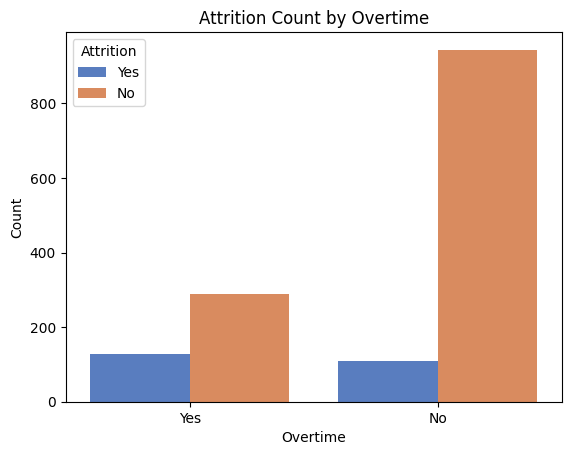

In [43]:
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='muted')
plt.title('Attrition Count by Overtime')
plt.xlabel('Overtime')
plt.ylabel('Count')
plt.show()

# 16.Is it possible that employees are leaving because of the work environment?
# && 17.How does the environment satisfaction impact attrition?
# && 18.How does self Job Satisfaction impact the Attrition?


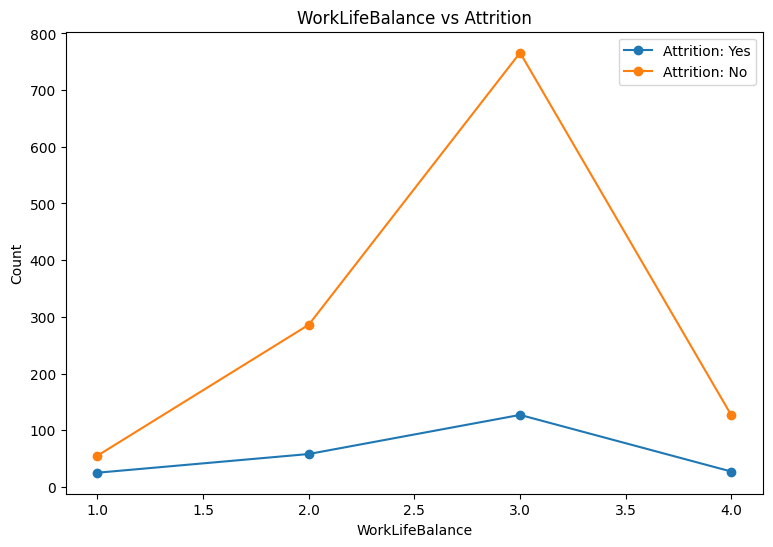

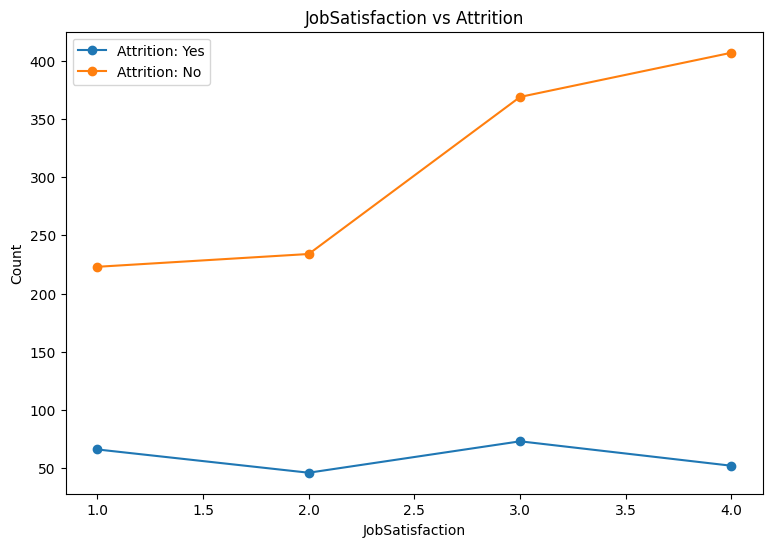

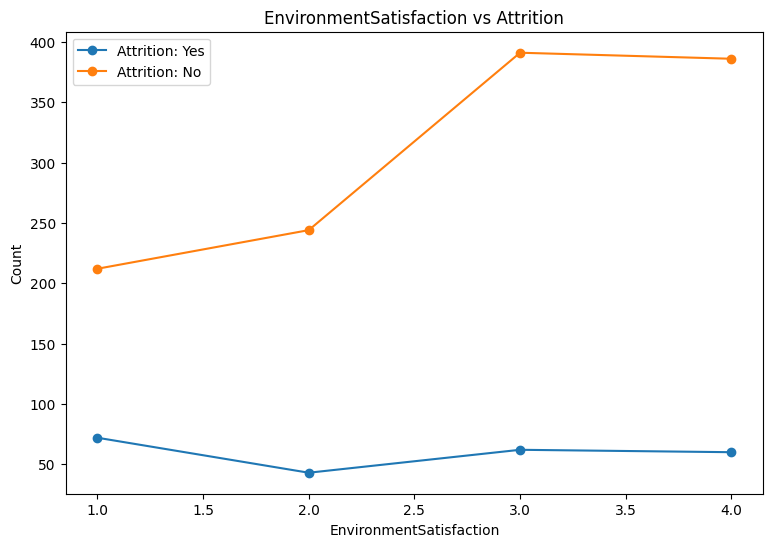

In [44]:
factors = ['WorkLifeBalance', 'JobSatisfaction', 'EnvironmentSatisfaction']

for factor in factors:
    plt.figure(figsize=(9, 6))
    for attrition_category in df['Attrition'].unique():
        data_attrition = df[df['Attrition'] == attrition_category]
        plt.plot(
            data_attrition.groupby(factor).size().index,
            data_attrition.groupby(factor).size().values,
            marker='o',
            label=f'Attrition: {attrition_category}'
        )
    
    plt.title(f'{factor} vs Attrition')
    plt.xlabel(factor)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

# 19.How does work experience affect attrition?

In [45]:
attrition_rates = attrition_data.groupby('TotalWorkingYears')['Attrition'].value_counts().unstack()
attrition_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,19,3,...,3,2,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,27,3,...,4,2,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,31,2,...,3,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,2023,4,...,3,1,1,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,2027,1,...,3,2,3,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,2032,4,...,3,4,1,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,2044,2,...,3,4,2,12,3,3,6,3,0,1


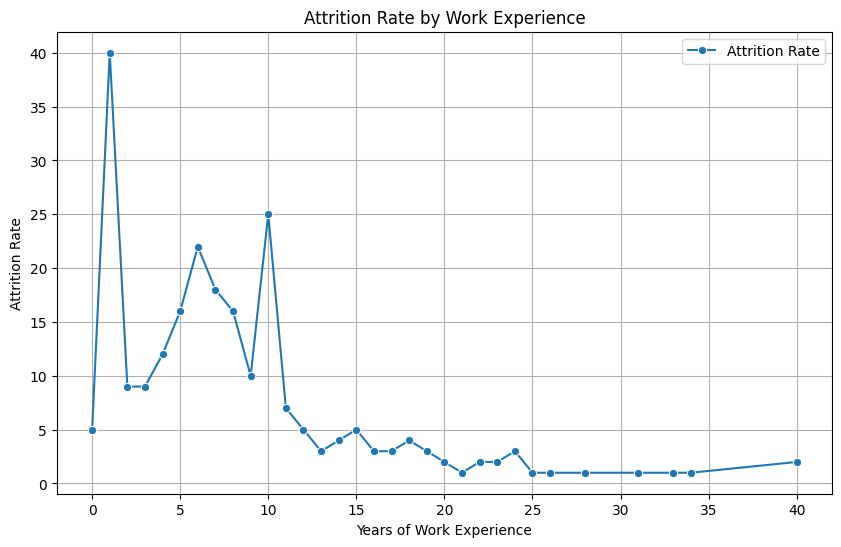

In [46]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=attrition_rates.reset_index(), x='TotalWorkingYears', y='Yes', marker='o', label='Attrition Rate')
plt.title('Attrition Rate by Work Experience')
plt.xlabel('Years of Work Experience')
plt.ylabel('Attrition Rate')
plt.legend()
plt.grid(True)
plt.show()

# 20.Are more educated people more likely to leave?

In [47]:
# Calculate attrition rates for each education level
attrition_rates_education = df.groupby('Education')['Attrition'].value_counts().unstack().fillna(0)
attrition_rates_education

Attrition,No,Yes
Education,,
1,139,31
2,238,44
3,473,99
4,340,58
5,43,5


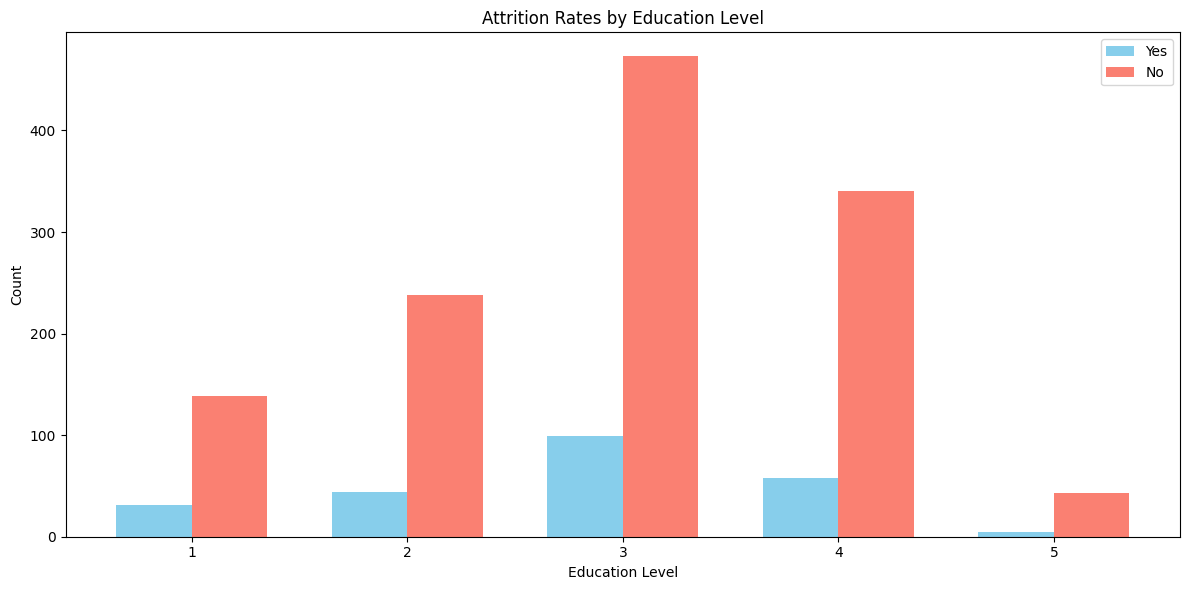

In [48]:
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = range(5)

# Plotting 'Yes' counts
bar1 = plt.bar(index, attrition_rates_education['Yes'], bar_width, label='Yes', color='skyblue')
# Plotting 'No' counts
bar2 = plt.bar([i + bar_width for i in index], attrition_rates_education['No'], bar_width, label='No', color='salmon')

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Attrition Rates by Education Level')
plt.xticks([i + bar_width / 2 for i in index], attrition_rates_education.index)
plt.legend()
plt.tight_layout()
plt.show()